## Linear Reg Model for 2014-2018 Data for states

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np

In [2]:
# Load the data
dataset_14to18 = pd.read_csv('MORTH DATA/fatality_data_2014to2018_by_states&UTs.csv')
dataset_14to18

,State/UT,2014,2015,2016,2017,2018
0,Andhra Pradesh,7908,8297,8541,8060,7556
1,Arunachal Pradesh,119,127,149,110,175
2,Assam,2522,2572,2572,2783,2966
3,Bihar,4913,5421,5077,5554,6729
4,Chhattisgarh,4202,4082,3908,4146,4592
5,Goa,290,311,336,328,262
6,Gujarat,7955,8119,8136,7829,7996
7,Haryana,4483,4879,5024,5120,5118
8,Himachal Pradesh,1199,1096,1271,1203,1208
9,Jammu & Kashmir,992,917,958,926,984


In [3]:
# Importing libraries for ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target Selection
# Use data from 2014 to 2017 as features to predict 2018 fatalities
X = dataset_14to18[['2014', '2015', '2016', '2017']]
y = dataset_14to18['2018']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Optional: Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the model:")
print(coefficients)

# Predict fatalities for all data points (to check trends)
dataset_14to18['Predicted_2018'] = model.predict(X)
print("\nSample of Predictions:")
print(dataset_14to18[['State/UT', '2018', 'Predicted_2018']])


Root Mean Squared Error (RMSE): 490.80
R-squared (R²): 0.99

Coefficients of the model:
      Coefficient
2014    -2.399900
2015     4.069958
2016    -2.655434
2017     1.978038

Sample of Predictions:
                     State/UT   2018  Predicted_2018
0              Andhra Pradesh   7556     8073.861279
1           Arunachal Pradesh    175       74.125654
2                       Assam   2966     3111.392344
3                       Bihar   6729     7797.823027
4                Chhattisgarh   4592     4373.602951
5                         Goa    262      347.261161
6                     Gujarat   7996     7855.137540
7                     Haryana   5118     5906.132132
8            Himachal Pradesh   1208      608.621529
9             Jammu & Kashmir    984      660.112688
10                  Jharkhand   3542     3890.848940
11                  Karnataka  10990    10542.672139
12                     Kerala   4303     4168.682646
13             Madhya Pradesh  10706    11879.926784
14 

## Linear Reg Model for 2018-2022 Data for states

In [4]:
# Load the data
dataset_18to22 = pd.read_csv('MORTH DATA/fatality_data_2018to2022_by_states&UTs.csv')
dataset_18to22

,State/UT,2018,2019,2020,2021,2022
0,Andhra Pradesh,7556,7984,7039,8186,8293
1,Arunachal Pradesh,175,127,73,157,148
2,Assam,2966,3208,2629,3036,2994
3,Bihar,6729,7205,6695,7660,8898
4,Chhattisgarh,4592,5003,4606,5371,5834
5,Goa,262,297,223,226,271
6,Gujarat,7996,7390,6170,7452,7618
7,Haryana,5118,5057,4507,4706,4915
8,Himachal Pradesh,1208,1146,893,1052,1032
9,Jharkhand,3542,3801,3044,3513,3898


In [5]:
# Importing libraries for ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target Selection
# Use data from 2018 to 2021 as features to predict 2022 fatalities
X2 = dataset_18to22[['2018', '2019', '2020', '2021']]
y2 = dataset_18to22['2022']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model.predict(X2_test)

# Evaluate the model
rmse = mean_squared_error(y2_test, y2_pred, squared=False)  # Root Mean Squared Error
r22 = r2_score(y2_test, y2_pred)  # R-squared

# Display the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Optional: Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X2.columns, columns=['Coefficient'])
print("\nCoefficients of the model:")
print(coefficients)

# Predict fatalities for all data points (to check trends)
dataset_18to22['Predicted_2022'] = model.predict(X2)
print("\nSample of Predictions:")
print(dataset_18to22[['State/UT', '2022', 'Predicted_2022']])

Root Mean Squared Error (RMSE): 631.12
R-squared (R²): 0.99

Coefficients of the model:
      Coefficient
2018    -0.330655
2019     0.673791
2020     0.518244
2021     0.274559

Sample of Predictions:
                     State/UT   2022  Predicted_2022
0              Andhra Pradesh   8293     8754.982174
1           Arunachal Pradesh    148       87.044770
2                       Assam   2994     3355.225346
3                       Bihar   8898     8180.856254
4                Chhattisgarh   5834     5692.699804
5                         Goa    271      269.503471
6                     Gujarat   7618     7557.381632
7                     Haryana   4915     5321.271957
8            Himachal Pradesh   1032     1102.762092
9                   Jharkhand   3898     3910.362340
10                  Karnataka  11702    11541.993696
11                     Kerala   4317     4032.537827
12             Madhya Pradesh  13427    13102.002814
13                Maharashtra  15224    13919.829575
14 

## Linear Reg Model for 2014-2022 (complete cleaned data) for States/UTs

In [10]:
# Load the data
dataset_14to22 = pd.read_csv('MORTH DATA/Fatality_Data_2014-2022_by_states&UTs.csv')
dataset_14to22 = dataset_14to22[dataset_14to22["State/UT"] != "Lakshadweep"]
dataset_14to22

,State/UT,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Andhra Pradesh,7908,8297,8541,8060,7556,7984,7039,8186,8293
1,Arunachal Pradesh,119,127,149,110,175,127,73,157,148
2,Assam,2522,2572,2572,2783,2966,3208,2629,3036,2994
3,Bihar,4913,5421,5077,5554,6729,7205,6695,7660,8898
4,Chhattisgarh,4202,4082,3908,4146,4592,5003,4606,5371,5834
5,Goa,290,311,336,328,262,297,223,226,271
6,Gujarat,7955,8119,8136,7829,7996,7390,6170,7452,7618
7,Haryana,4483,4879,5024,5120,5118,5057,4507,4706,4915
8,Himachal Pradesh,1199,1096,1271,1203,1208,1146,893,1052,1032
9,Jammu & Kashmir,992,917,958,926,984,996,728,774,805


In [19]:
# Importing libraries for ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target Selection
# Use data from 2014 to 2021 as features to predict 2022 fatalities
X3 = dataset_14to22[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
y3 = dataset_14to22['2022']

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(np.log(X3), np.log(y3), test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred_log = model.predict(X3_test) # Predictions in log scale
y3_pred = np.exp(y3_pred_log)        # convert predictions back to original scale

# Convert test target values back to original scale
y3_test_original = np.exp(y3_test)

# Evaluate the model
rmse_original = mean_squared_error(y3_test_original, y3_pred, squared=False)  # Root Mean Squared Error in original scale
r23_original = r2_score(y3_test_original, y3_pred)  # R-squared in original scale

# Display the evaluation metrics
print(f"Root Mean Squared Error (RMSE - Original Scale): {rmse_original:.2f}")
print(f"R-squared (R² - Original Scale): {r23_original:.2f}")

# Predict fatalities for all data points
dataset_14to22['Predicted_2022'] = np.exp(model.predict(np.log(X3)))

# Display predictions alongside actual values
print("\nSample of Predictions:")
print(dataset_14to22[['State/UT', '2022', 'Predicted_2022']])

Root Mean Squared Error (RMSE - Original Scale): 200.28
R-squared (R² - Original Scale): 0.99

Sample of Predictions:
                           State/UT   2022  Predicted_2022
0                    Andhra Pradesh   8293     8136.769312
1                 Arunachal Pradesh    148      151.298437
2                             Assam   2994     3427.360131
3                             Bihar   8898     7973.177624
4                      Chhattisgarh   5834     5571.099936
5                               Goa    271      270.502160
6                           Gujarat   7618     7977.125522
7                           Haryana   4915     5413.921751
8                  Himachal Pradesh   1032     1296.344480
9                   Jammu & Kashmir    805     1012.401229
10                        Jharkhand   3898     4032.200783
11                        Karnataka  11702    11411.416909
12                           Kerala   4317     4154.445710
13                   Madhya Pradesh  13427    12765.9038

## Pattern Fitting Check for complete data

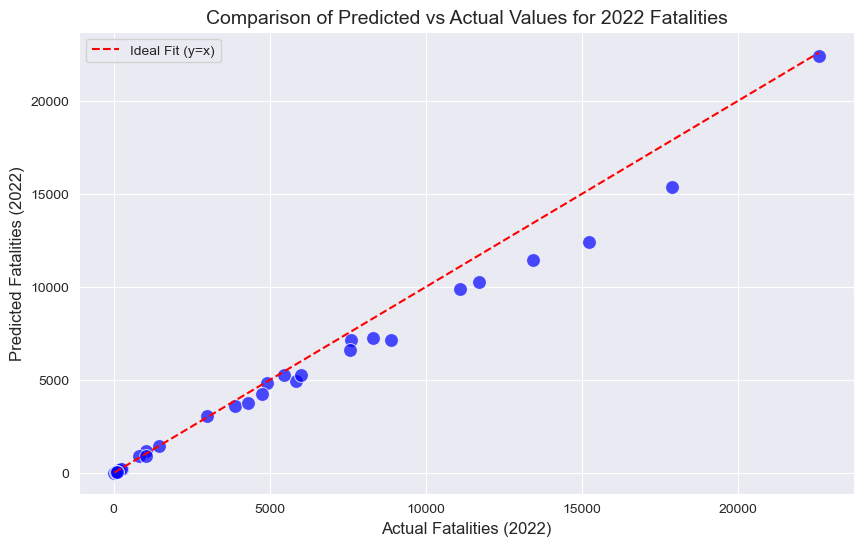

In [18]:
# Re-importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset_14to22['2022'], y=dataset_14to22['Predicted_2022'], color='blue', alpha=0.7, s=100)

# Plot the ideal fit line (y=x)
plt.plot([dataset_14to22['2022'].min(), dataset_14to22['2022'].max()], 
         [dataset_14to22['2022'].min(), dataset_14to22['2022'].max()], 
         color='red', linestyle='--', label='Ideal Fit (y=x)')

# Add labels, title, and legend
plt.title('Comparison of Predicted vs Actual Values for 2022 Fatalities', fontsize=14)
plt.xlabel('Actual Fatalities (2022)', fontsize=12)
plt.ylabel('Predicted Fatalities (2022)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## Predicting fatalities for future years

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset (adjust the file path as needed)
statewise_data = pd.read_csv("MORTH DATA/Fatality_Data_2014-2022_by_states&UTs.csv")  # Replace with your file path

# Melt the dataset: Make "Year" a column
df_melted = statewise_data.melt(id_vars=["State/UT"], var_name="Year", value_name="Fatalities")
df_melted["Year"] = df_melted["Year"].astype(int)  # Ensure 'Year' is treated as an integer

# Prepare future years
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

# Prepare a DataFrame to hold future predictions
predictions = []

# Iterate over each state/UT to extrapolate fatalities
for state in df_melted["State/UT"].unique():
    # Filter data for the current state
    state_data = df_melted[df_melted["State/UT"] == state]
    
    # Extract years and fatalities
    years = state_data["Year"]
    fatalities = state_data["Fatalities"]
    
    # Fit a linear trend (you can adjust the degree for non-linear trends)
    p = np.polyfit(years, fatalities, 1)  # Linear trend (degree=1)
    
    # Predict fatalities for future years
    future_fatalities = np.polyval(p, future_years)
    
    # Round up predictions to the next integer
    future_fatalities = np.ceil(future_fatalities).astype(int)
    
    # Create a DataFrame for future predictions
    state_future = pd.DataFrame({
        "State/UT": state,
        "Year": future_years,
        "Predicted Fatalities": future_fatalities
    })
    
    # Append to the list of predictions
    predictions.append(state_future)

# Combine all predictions into a single DataFrame
final_predictions = pd.concat(predictions, ignore_index=True)

# Save predictions to CSV
final_predictions.to_csv("statewise_fatalities_predictions_2023_2030.csv", index=False)
print("Predictions saved to 'statewise_fatalities_predictions_2023_2030.csv'")

# Display sample predictions
print(final_predictions.head())


## Road Accidents, Registered Vehicles and Road Length in India (2011-2019)

In [ ]:
# Load the cleaned data
df_RA_RV_RL = pd.read_csv('MORTH DATA/Year,Road Accidents, RegVehicle 2011-2019.txt')
df_RA_RV_RL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
X4 = df_RA_RV_RL[[
    "Road Accidents ('000)",
    "Road Accident Injuries ('000)",
    "Registered Vehicles ('000)",
    "Road Length ('000 km)",
    "Vehicle Density (vehicles per km)"
]]
y4 = df_RA_RV_RL["Road Accident Deaths ('000)"]

# Train-Test Split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X4_train, y4_train)

# Predictions
y4_pred = model.predict(X4_test)

# Evaluation
rmse = mean_squared_error(y4_test, y4_pred, squared=False)
r24 = r2_score(y4_test, y4_pred)

# Display Results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Display Coefficients
coefficients = pd.DataFrame(model.coef_, X4.columns, columns=["Coefficient"])
print("\nCoefficients:")
print(coefficients)

# Predict Deaths for All Data Points (Optional)
df_RA_RV_RL["Predicted Deaths ('000)"] = model.predict(X4)
print("\nSample of Predictions:")
print(df_RA_RV_RL[["Year", "Road Accident Deaths ('000)", "Predicted Deaths ('000)"]])


## Linear Regression on log scale data for each state

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("MORTH DATA/Fatality_Data_2014-2022_by_states&UTs.csv")
data = data[data["State/UT"] != "Lakshadweep"]
# List of years for features and the target year
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
target_year = '2022'

# Store predictions for all states/UTs
predictions = {}

# Loop through each state/UT and build a separate Linear Regression model
for state in data['State/UT'].unique():
    # Filter data for the current state
    state_data = data[data['State/UT'] == state]
    
    # Extract features (log-transformed) and target (log-transformed)
    X = np.log(state_data[years].values)
    y = np.log(state_data[target_year].values)
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for the next year (e.g., 2023 to 2030) using trends
    future_years = list(range(2023, 2030))
    future_X = np.log(state_data[years].values)  # Using past data trends
    
    # Convert predictions back to original scale
    future_predictions_log = model.predict(future_X)
    future_predictions_original = np.exp(future_predictions_log)
    
    # Store predictions for the current state
    predictions[state] = future_predictions_original

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=future_years)
predictions_df.index.name = 'Year'

# Save the predictions to a CSV file
predictions_df.to_csv("statewise_future_fatalities.csv")

# Display the first few rows of predictions
print(predictions_df.head())


      Andhra Pradesh  Arunachal Pradesh   Assam   Bihar  Chhattisgarh    Goa  \
Year                                                                           
2023          8293.0              148.0  2994.0  8898.0        5834.0  271.0   
2024          8293.0              148.0  2994.0  8898.0        5834.0  271.0   
2025          8293.0              148.0  2994.0  8898.0        5834.0  271.0   
2026          8293.0              148.0  2994.0  8898.0        5834.0  271.0   
2027          8293.0              148.0  2994.0  8898.0        5834.0  271.0   

      Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  ...  Tamil Nadu  \
Year                                                       ...               
2023   7618.0   4915.0            1032.0            805.0  ...     17884.0   
2024   7618.0   4915.0            1032.0            805.0  ...     17884.0   
2025   7618.0   4915.0            1032.0            805.0  ...     17884.0   
2026   7618.0   4915.0            1032.0         

## Linear Regression for YOY growth rate data for each state

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("MORTH DATA/Fatality_Data_2014-2022_by_states&UTs.csv")
data = data[data["State/UT"] != "Lakshadweep"]

# List of years for calculation and modeling
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Calculate Year-over-Year (YoY) growth rates
for i in range(1, len(years)):
    data[f'YoY_{years[i]}'] = (data[years[i]] - data[years[i-1]]) / data[years[i-1]] * 100

# Store predictions for all states/UTs
predictions = {}

# Loop through each state/UT to build and apply the model
for state in data['State/UT'].unique():
    # Filter data for the current state
    state_data = data[data['State/UT'] == state]
    
    # Features: Previous YoY growth rates
    yoy_columns = [f'YoY_{year}' for year in years[1:-1]]  # Exclude the last year's growth (2022)
    X = state_data[yoy_columns].values.reshape(-1, len(yoy_columns))
    
    # Target: YoY growth rate for the last year
    y = state_data[f'YoY_{years[-1]}'].values  # YoY growth for 2022
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict YoY growth rates for future years (2023 to 2030)
    future_years = list(range(2023, 2031))
    future_yoy = model.predict(X)  # Predict growth rates based on the model
    
    # Use the predicted YoY growth rates to calculate fatalities for future years
    last_year_fatalities = state_data[years[-1]].values[0]  # Fatalities in 2022
    future_fatalities = [last_year_fatalities]  # Initialize with the value for 2022
    
    for i in range(len(future_years)):
        next_fatalities = future_fatalities[-1] * (1 + future_yoy[i % len(future_yoy)] / 100)
        future_fatalities.append(round(next_fatalities))  # Round to the nearest integer
    
    # Store predictions for the current state (excluding the initial 2022 value)
    predictions[state] = future_fatalities[1:]

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=future_years)
predictions_df.index.name = 'Year'

# Save the predictions to a CSV file
predictions_df.to_csv("statewise_future_fatalities_yoy_int.csv")

# Display the first few rows of predictions
print(predictions_df.head())


      Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  Goa  \
Year                                                                       
2023            8401                140   2953  10336          6337  325   
2024            8511                132   2912  12006          6883  390   
2025            8622                124   2872  13946          7476  468   
2026            8735                117   2832  16200          8120  561   
2027            8849                110   2793  18818          8820  673   

      Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  ...  Tamil Nadu  \
Year                                                       ...               
2023     7788     5133              1012              837  ...       20790   
2024     7961     5361               993              871  ...       24169   
2025     8138     5599               974              906  ...       28097   
2026     8319     5848               955              942  ...       32663   

## 2022 testing YOY

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("MORTH DATA/Fatality_Data_2014-2022_by_states&UTs.csv")
data = data[data["State/UT"] != "Lakshadweep"]

# List of years for calculation and modeling
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Calculate Year-over-Year (YoY) growth rates
for i in range(1, len(years)):
    data[f'YoY_{years[i]}'] = (data[years[i]] - data[years[i-1]]) / data[years[i-1]] * 100

# Store predictions and evaluation metrics
test_predictions = []
actual_values = []
states = []
rmse_list = []
r2_list = []

# Loop through each state/UT to build and test the model
for state in data['State/UT'].unique():
    # Filter data for the current state
    state_data = data[data['State/UT'] == state]
    
    # Features: YoY growth rates up to 2021
    yoy_columns = [f'YoY_{year}' for year in years[1:-1]]  # Exclude YoY_2022
    X = state_data[yoy_columns].values.reshape(-1, len(yoy_columns))
    
    # Target: YoY growth rate for 2022
    y = state_data[f'YoY_{years[-1]}'].values  # YoY growth for 2022
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the YoY growth rate for 2022
    predicted_yoy_2022 = model.predict(X)[0]  # Single prediction testing on 2022
    
    # Calculate the predicted fatalities for 2022
    actual_2021 = state_data['2021'].values[0]  # Fatalities in 2021
    predicted_2022 = round(actual_2021 * (1 + predicted_yoy_2022 / 100))
    
    # Append results for evaluation
    test_predictions.append(predicted_2022)
    actual_values.append(state_data['2022'].values[0])
    states.append(state)
    
    # Evaluate model performance for this state
    rmse = np.sqrt(mean_squared_error([state_data['2022'].values[0]], [predicted_2022]))
    r2 = r2_score([state_data['2022'].values[0]], [predicted_2022])
    rmse_list.append(rmse)
    r2_list.append(r2)

# Create a DataFrame for testing results
testing_results = pd.DataFrame({
    'State/UT': states,
    'Actual_2022': actual_values,
    'Predicted_2022': test_predictions,
    'RMSE': rmse_list,
    'R2_Score': r2_list
})

# Save the testing results to a CSV file
testing_results.to_csv("testing_results_2022.csv", index=False)

# Display the testing results
print("\nTesting Results (2022 Predictions):")
print(testing_results.head())

# Summary of overall performance
overall_rmse = np.sqrt(mean_squared_error(actual_values, test_predictions))
overall_r2 = r2_score(actual_values, test_predictions)
print(f"\nOverall RMSE: {overall_rmse:.2f}")
print(f"Overall R² Score: {overall_r2:.2f}")



Testing Results (2022 Predictions):
            State/UT  Actual_2022  Predicted_2022  RMSE  R2_Score
0     Andhra Pradesh         8293            8293   0.0       NaN
1  Arunachal Pradesh          148             148   0.0       NaN
2              Assam         2994            2994   0.0       NaN
3              Bihar         8898            8898   0.0       NaN
4       Chhattisgarh         5834            5834   0.0       NaN

Overall RMSE: 0.00
Overall R² Score: 1.00


C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWa

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("MORTH DATA/Fatality_Data_2014-2022_by_states&UTs.csv")
data = data[data["State/UT"] != "Lakshadweep"]

# List of years for calculation and modeling
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Step 1: Calculate Year-over-Year (YoY) growth rates
for i in range(1, len(years)):
    data[f'YoY_{years[i]}'] = (data[years[i]] - data[years[i-1]]) / data[years[i-1]] * 100

# Prepare storage for predictions
future_years = list(range(2023, 2031))
predictions = {}

# Step 2: Model YoY Growth Rates for each state
for state in data['State/UT'].unique():
    # Filter data for the current state
    state_data = data[data['State/UT'] == state]
    
    # Features: YoY growth rates from 2015 to 2021
    yoy_columns = [f'YoY_{year}' for year in years[1:-1]]  # Exclude YoY_2022
    X = np.array(range(len(yoy_columns))).reshape(-1, 1)  # Time indices as features
    y = state_data[yoy_columns].values.flatten()  # YoY growth rates as target
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict YoY growth rates for future years (2023–2030)
    future_indices = np.array(range(len(yoy_columns), len(yoy_columns) + len(future_years))).reshape(-1, 1)
    future_yoy_predictions = model.predict(future_indices)
    
    # Step 3: Predict future fatalities using predicted YoY growth rates
    last_year_fatalities = state_data['2022'].values[0]  # Fatalities in 2022
    future_fatalities = [last_year_fatalities]
    
    for growth_rate in future_yoy_predictions:
        next_fatalities = future_fatalities[-1] * (1 + growth_rate / 100)
        future_fatalities.append(round(next_fatalities))  # Round to nearest integer
    
    # Store predictions for the current state
    predictions[state] = future_fatalities[1:]  # Exclude 2022 fatalities

# Step 4: Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=future_years)
predictions_df.index.name = 'Year'

# Save the predictions to a CSV file
predictions_df.to_csv("statewise_future_fatalities_lr_yoy.csv")

# Display the first few rows of predictions
print(predictions_df.head())


      Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  Goa  \
Year                                                                       
2023            8553                213   3108   9627          6511  238   
2024            8870                322   3231  10445          7392  203   
2025            9249                510   3364  11364          8535  168   
2026            9697                845   3508  12398         10019  135   
2027           10221               1461   3664  13564         11954  105   

      Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  ...  Tamil Nadu  \
Year                                                       ...               
2023     7795     4648              1027              763  ...       17363   
2024     8028     4322              1023              719  ...       16693   
2025     8323     3951              1020              673  ...       15891   
2026     8685     3550              1018              626  ...       14977   